In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## 1.

In [4]:
credit = pd.read_csv('Credit (1).csv')

In [7]:
credit = credit.drop(columns='Unnamed: 0')

In [8]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [11]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [9]:
# Check which variables have missing values
columns_with_missing_values = credit.columns[credit.isnull().any()]
credit[columns_with_missing_values].isnull().sum()

Series([], dtype: float64)

- No missing values in the data set.

In [14]:
credit1 = pd.get_dummies(credit,columns=['Gender', 'Student', 'Married', 'Ethnicity'], drop_first = True)

In [18]:
credit1.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1


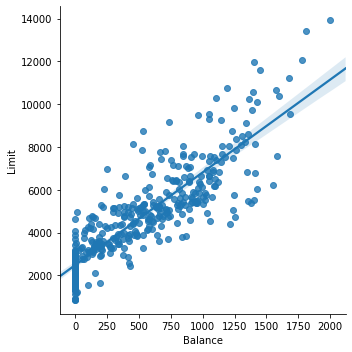

In [34]:
#Balance vs limit
sns.lmplot(x='Balance', y='Limit', data = credit1)
plt.show()

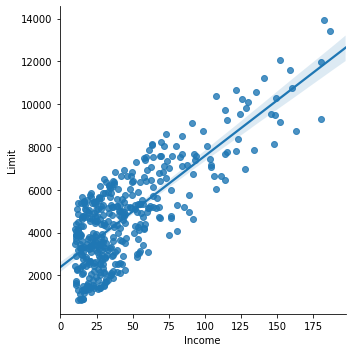

In [35]:
#Income vs limit
sns.lmplot(x='Income', y='Limit', data = credit1)
plt.show()

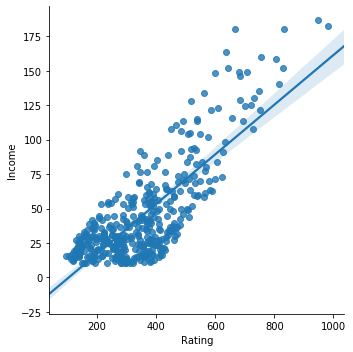

In [29]:
#Rating vs income
sns.lmplot(x='Rating', y='Income', data = credit1)
plt.show()

- Our target variable is Rating
- There is a strong correlation between Rating,Income, Balance and Limit from the plot.

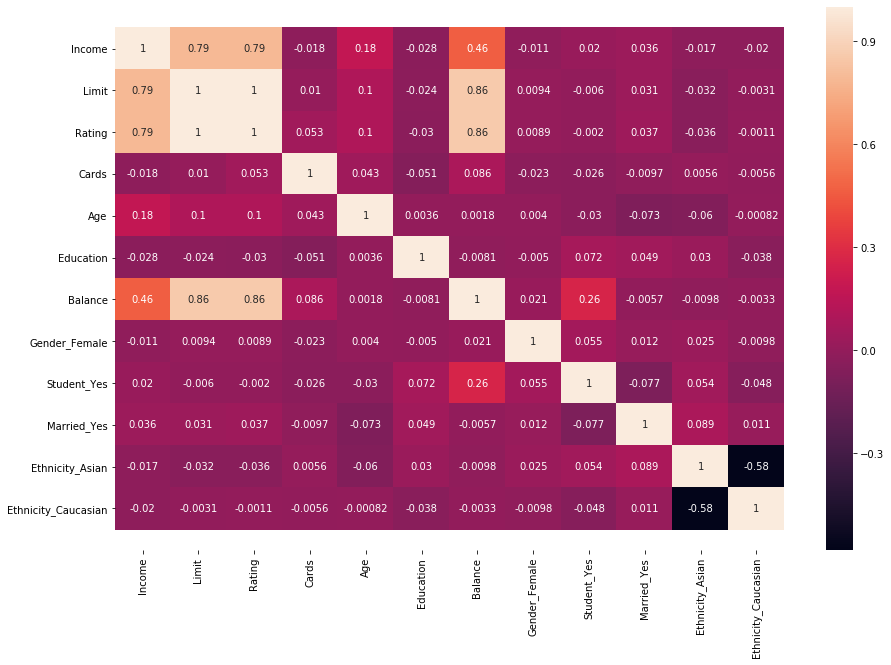

In [21]:
cor = credit1.corr()
plt.figure(figsize=(15,10))
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

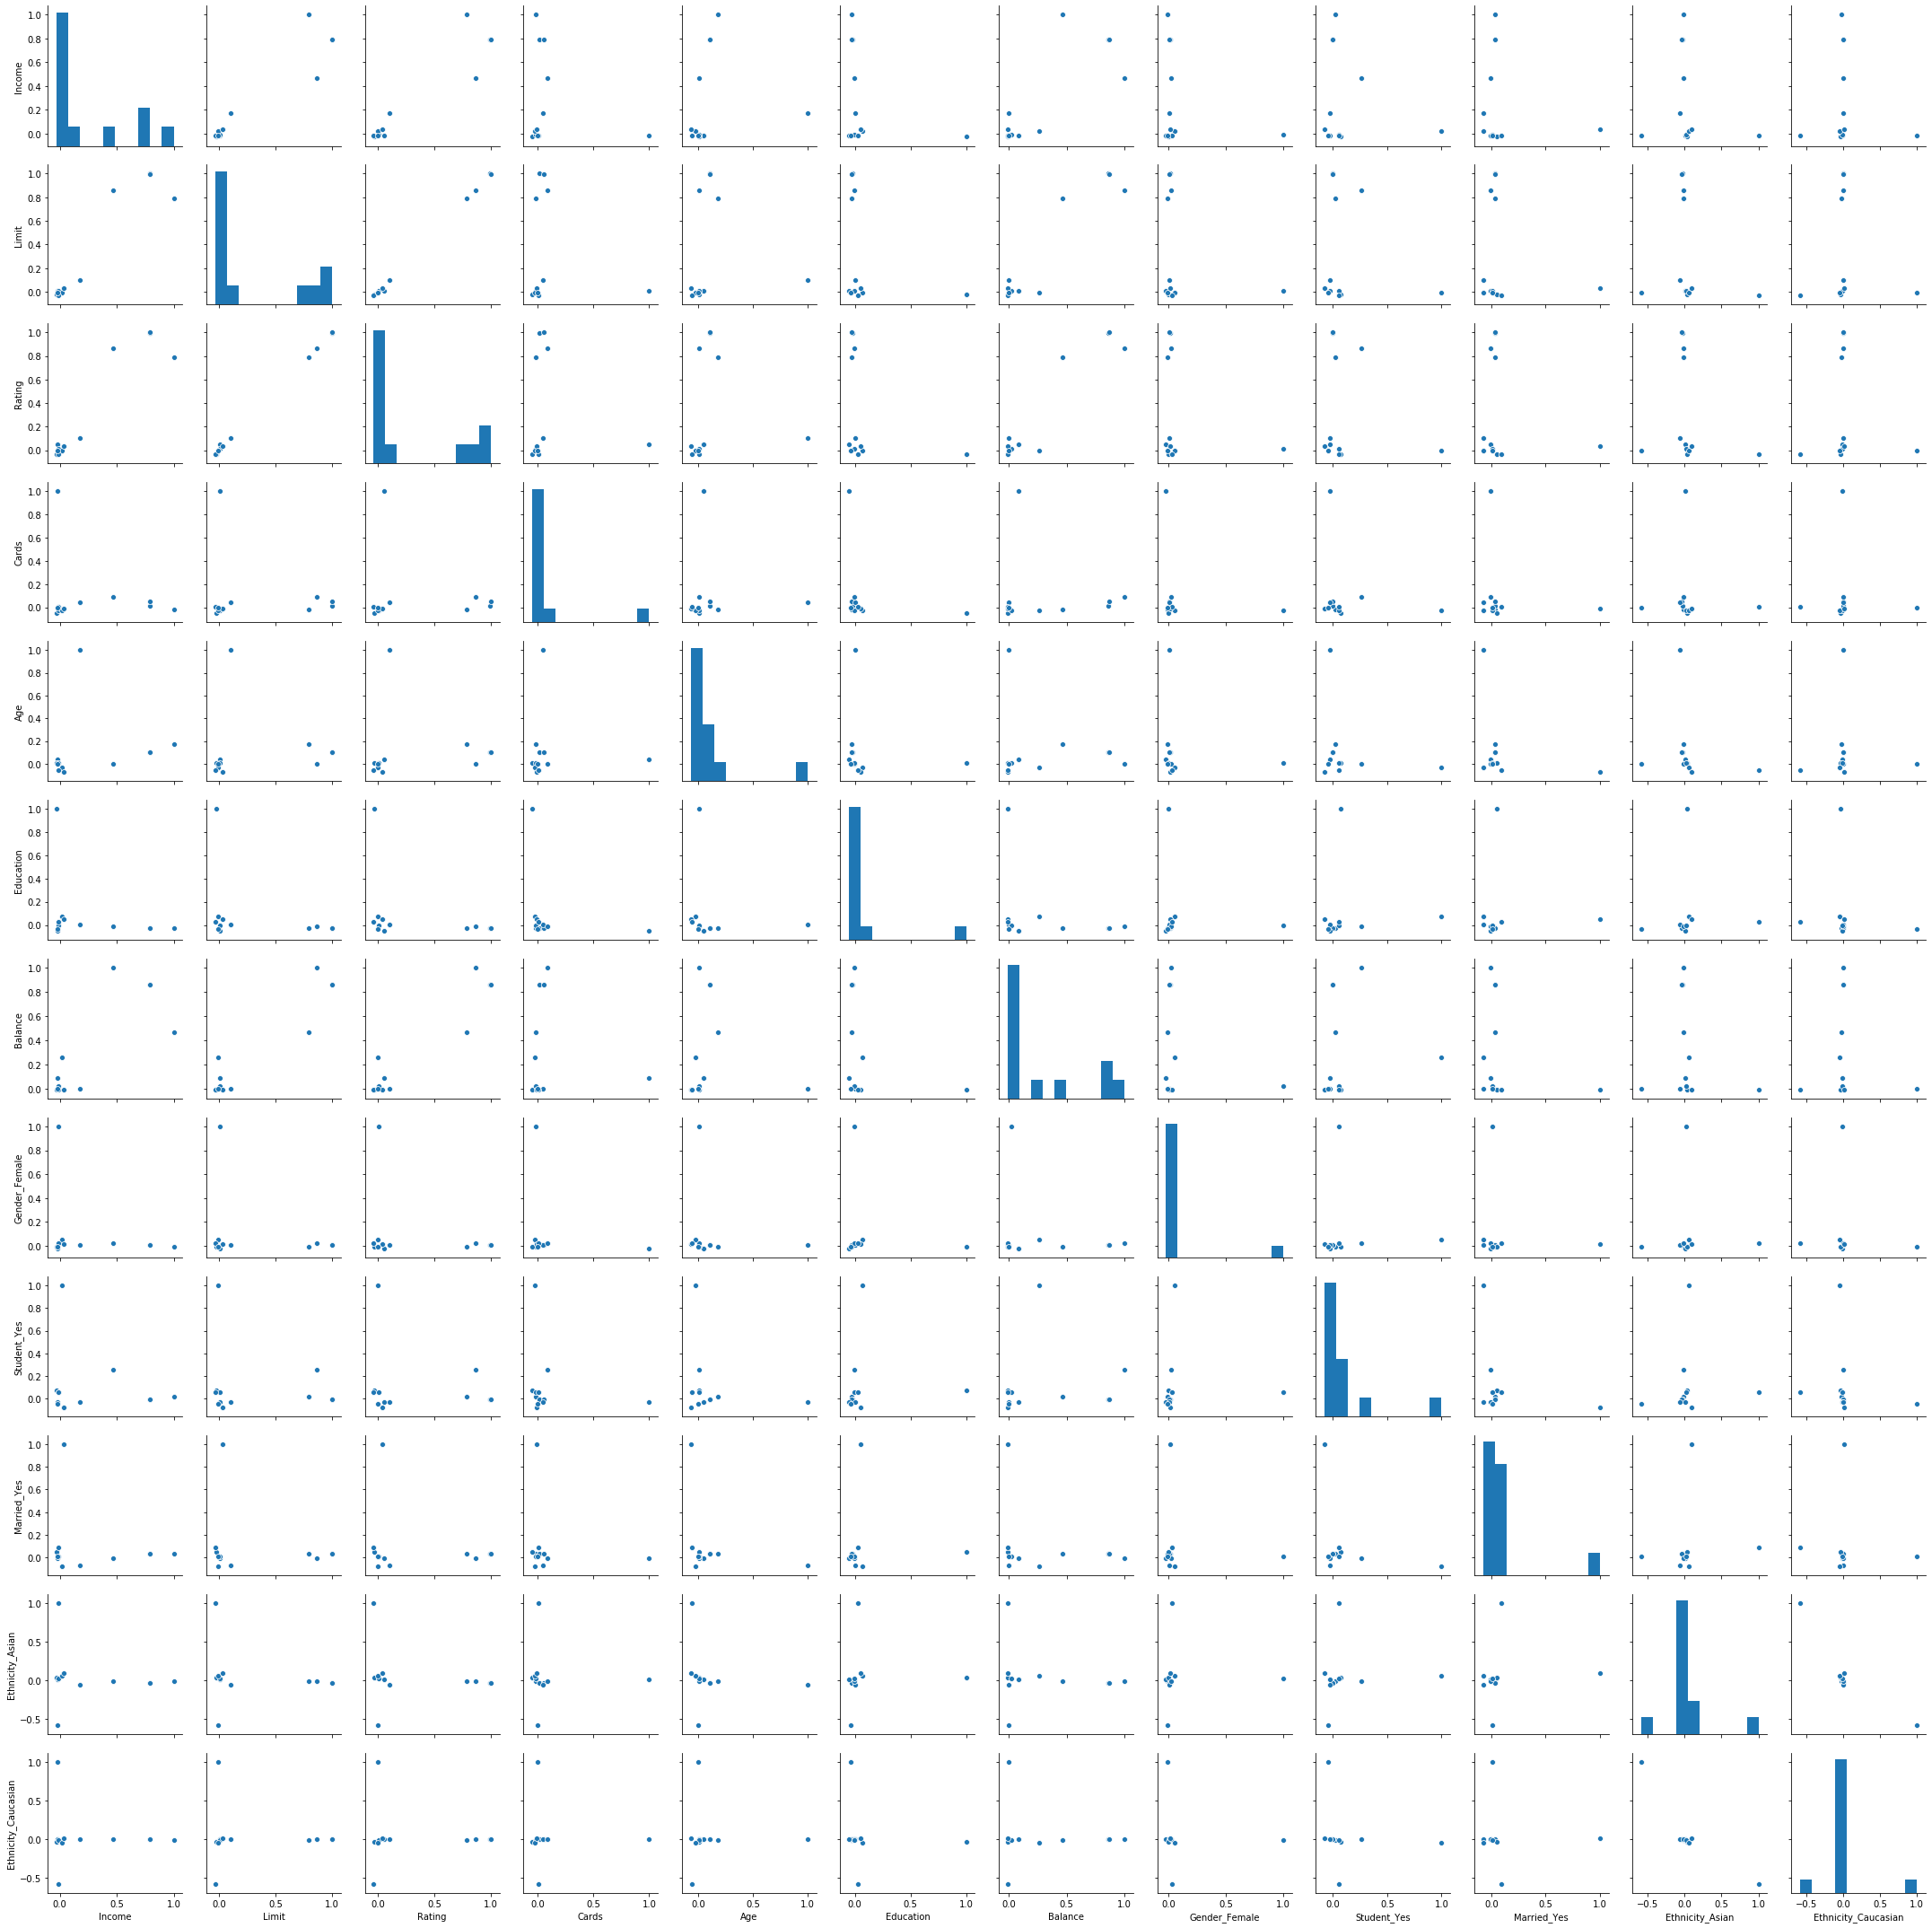

In [22]:
sns.pairplot(credit1.corr())
plt.show()

- Based on the above plots, I can infer that the feature 'limit','income' and 'balance' are higly correlated with 'rating'.

## 2.

In [36]:
x =  credit1.drop('Limit',axis=1)
y = credit1.Limit

In [37]:
import statsmodels.api as sm 
x_constant = sm.add_constant(x)
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x_constant,y, test_size = 0.30, random_state = 1)

In [86]:
lin_reg = LinearRegression()
x_constant = sm.add_constant(x_train)
model = sm.OLS(y_train,x_constant).fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5878.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          2.47e-312
Time:                        14:47:51   Log-Likelihood:                -1789.5
No. Observations:                 280   AIC:                             3603.
Df Residuals:                     268   BIC:                             3647.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -162.3219     76.324     -2.127      0.034    -312.592     -12.052
Income                  2.7157      0.824      3.297      0.001       1.094       4.338
Rating                 13.5171      0.374     36.124      0.000      12.780      14.254
Cards                 -74.3194      6.300    -11.796      0.000     -86.724     -61.915
Age                     0.1654      0.509      0.325      0.746      -0.837       1.168
Education               3.8253      2.826      1.354      0.177      -1.739       9.389
Balance                 0.3222      0.092      3.519      0.001       0.142       0.502
Gender_Female           2.6253     17.878      0.147      0.883     -32.573      37.824
Student_Yes          -164.8262     49.370     -3.339      0.001    -262.029     -67.624
Married_Yes           -34.6125     18.644     -1.856      0.064     -71.320       2.095
Ethnicity_Asian        12.2580     24.439      0.502      0.616     -35.859      60.375
Ethnicity_Caucasian    12.6617     21.847      0.580      0.563     -30.352      55.676
==============================================================================
Omnibus:                        6.713   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.825
Skew:                          -0.382   Prob(JB):                       0.0330
Kurtosis:                       2.953   Cond. No.                     7.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The R score value of the is model is 0.996.
- The R score and Adjacent R score of our model is equal.
- 2nd waring incidactes that out data set has beatures which have strong multicollinearity

## 3.

In [90]:
#3A) Create a function it will show the final output as below table:(8 Marks)

In [89]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
ypredict=model1.predict(x_test)

In [95]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,ypredict)
mse=mean_squared_error(y_test,ypredict)
rmse=np.sqrt(mse)
r_squared=r2_score(y_test,ypredict)
print('mae:',mae)
print('mse:',mse)
print('rmse:',rmse)
print('r_squared:',r_squared)

mae: 121.6051180950399
mse: 22276.400876689633
rmse: 149.25280860569973
r_squared: 0.9962401268124141


In [128]:
model1_1 = sm.OLS(y_test,x_test).fit()
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3115.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          1.04e-129
Time:                        15:20:27   Log-Likelihood:                -760.18
No. Observations:                 120   AIC:                             1544.
Df Residuals:                     108   BIC:                             1578.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -92.8429    127.537     -0.728      0.468    -345.644     159.958
Income                  4.6144      1.141      4.043      0.000       2.352       6.876
Rating                 12.6932      0.504     25.164      0.000      11.693      13.693
Cards                 -76.1260     11.272     -6.754      0.000     -98.468     -53.784
Age                    -0.0449      0.904     -0.050      0.960      -1.836       1.746
Education               3.7858      4.452      0.850      0.397      -5.039      12.611
Balance                 0.5995      0.120      4.992      0.000       0.361       0.838
Gender_Female           9.5219     27.086      0.352      0.726     -44.168      63.212
Student_Yes          -326.3432     65.630     -4.972      0.000    -456.434    -196.253
Married_Yes           -15.6409     27.970     -0.559      0.577     -71.082      39.800
Ethnicity_Asian        60.1959     42.988      1.400      0.164     -25.014     145.406
Ethnicity_Caucasian    -9.6564     34.404     -0.281      0.779     -77.850      58.538
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.842
Skew:                          -0.081   Prob(JB):                        0.398
Kurtosis:                       2.415   Cond. No.                     8.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
data = {'Train':[x_train.shape, rmse, 0.997, 0.997], 'Test':[x_test.shape, rmse, r_squared, 0.996]}   
df = pd.DataFrame(data, index =['Dataset Size', 'RMSE', 'R_square', 'Adj_Rsquare']) 
df 

,Train,Test
Dataset Size,"(280, 12)","(120, 12)"
RMSE,149.253,149.253
R_square,0.997,0.99624
Adj_Rsquare,0.997,0.996


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(x.values, j) for j in range(1, x.shape[1])]

[138.9190823265016,
 5.3748500073573435,
 11.065769240145562,
 14.933263270852846,
 28.67790197944486,
 2.076904547249909,
 2.1208426799505653,
 2.662752576005935,
 1.9830831906519673,
 2.8734121383537388]

In [99]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [101]:
train_out = calculate_vif(x)

Iteration no.
1
[17.25909969573904, 138.9190823265016, 5.3748500073573435, 11.065769240145562, 14.933263270852846, 28.67790197944486, 2.076904547249909, 2.1208426799505653, 2.662752576005935, 1.9830831906519673, 2.8734121383537388]
Max VIF is for variable no.:
1
Iteration no.
2
[3.576022408406926, 5.122164960340759, 9.32678069003024, 10.85952083433017, 3.209948566170123, 2.029408812254883, 1.2335564543552942, 2.5932814195640574, 1.9664097583374704, 2.8001915834069857]
Max VIF is for variable no.:
3
Iteration no.
3
[3.571301405568642, 4.784332202875124, 6.799775239034521, 3.1936960515898103, 1.9942857586767953, 1.2207426069782579, 2.4590413124835364, 1.876806547116403, 2.6575601828518303]
Max VIF is for variable no.:
2
Iteration no.
4
[3.152427723836035, 3.665129426312256, 3.191869164013802, 1.9117255507948736, 1.2177334524066639, 2.4087761639617518, 1.8005962832128404, 2.437252053493614]
Max VIF is for variable no.:
1


In [102]:
train_out.head()

,Income,Cards,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,2,333,0,0,1,0,1
1,106.025,3,903,1,1,1,1,0
2,104.593,4,580,0,0,0,1,0
3,148.924,3,964,1,0,0,1,0
4,55.882,2,331,0,0,1,0,1


In [103]:
x =  sm.add_constant(train_out)
y = credit1.Limit

In [104]:
x1_train, x1_test , y1_train, y1_test = train_test_split(x,y, test_size = 0.30, random_state = 1)

In [105]:
model2=LinearRegression()
model2.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y1predict=model2.predict(x2_test)

In [107]:
mae1=mean_absolute_error(y1_test,y1predict)
mse1=mean_squared_error(y1_test,y1predict)
rmse1=np.sqrt(mse1)
r_squared1=r2_score(y1_test,y1predict)
print('mae:',mae1)
print('mse:',mse1)
print('rmse:',rmse1)
print('r_squared:',r_squared1)

mae: 269.2735740391245
mse: 137158.0761108274
rmse: 370.34858729422393
r_squared: 0.9768500766490694


In [126]:
model2_1 = sm.OLS(y1_test,x1_test).fit()
model2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     627.6
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.17e-88
Time:                        15:19:40   Log-Likelihood:                -875.93
No. Observations:                 120   AIC:                             1770.
Df Residuals:                     111   BIC:                             1795.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1916.2644    127.551     15.023      0.000    1663.513    2169.016
Income                 30.9471      1.087     28.472      0.000      28.793      33.101
Cards                -102.8159     28.510     -3.606      0.000    -159.310     -46.322
Balance                 3.5011      0.088     39.937      0.000       3.327       3.675
Gender_Female          95.8930     69.463      1.380      0.170     -41.753     233.539
Student_Yes         -1508.8153    118.033    -12.783      0.000   -1742.705   -1274.926
Married_Yes            69.9353     70.726      0.989      0.325     -70.214     210.084
Ethnicity_Asian       -15.5403    110.691     -0.140      0.889    -234.881     203.801
Ethnicity_Caucasian   -83.4130     88.183     -0.946      0.346    -258.154      91.328
==============================================================================
Omnibus:                       29.068   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.638
Skew:                          -1.283   Prob(JB):                     1.50e-09
Kurtosis:                       4.244   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
data = {'Train':[x1_train.shape, rmse1, 0.987, 0.977], 'Test':[x1_test.shape, rmse1, r_squared1, 0.976]}   
df1 = pd.DataFrame(data, index =['Dataset Size', 'RMSE', 'R_square', 'Adj_Rsquare']) 
df1 

,Train,Test
Dataset Size,"(280, 9)","(120, 9)"
RMSE,370.349,370.349
R_square,0.987,0.97685
Adj_Rsquare,0.977,0.976


### Final table :

In [129]:
#table with all columns
df

,Train,Test
Dataset Size,"(280, 12)","(120, 12)"
RMSE,149.253,149.253
R_square,0.997,0.99624
Adj_Rsquare,0.997,0.996


In [130]:
#table without multicollinearity table
df1

,Train,Test
Dataset Size,"(280, 9)","(120, 9)"
RMSE,370.349,370.349
R_square,0.987,0.97685
Adj_Rsquare,0.977,0.976
